# Seul Bike

DATASET

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

**Variáveis**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius 

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

2024-05-11 17:28:19.939481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 17:28:20.588453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset_cols = ["rent_bike_count","hour","temp","humidity","wind","visibility",
                "dew_point_temperature","solar_radiation","rainfall","snowfall",
               "functional"]

In [3]:
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1) #axis=1 são as colunas
df.head(4)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df.head(2)

,rent_bike_count,hour,temp,humidity,wind,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes


In [5]:
df["functional"]= (df["functional"]== "Yes").astype(int)

In [6]:
df.head(2)

,rent_bike_count,hour,temp,humidity,wind,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1


In [7]:
df = df[df["hour"] == 12] # separando só no horario do meio dia
df = df.drop(["hour"], axis=1)

In [8]:
df.head(2)

,rent_bike_count,temp,humidity,wind,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1


In [9]:
len(df)

365

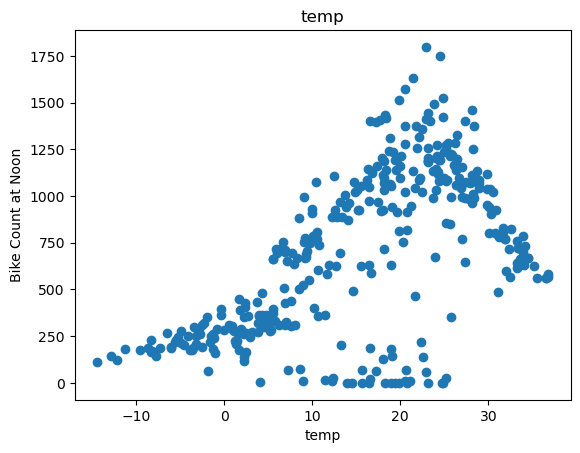

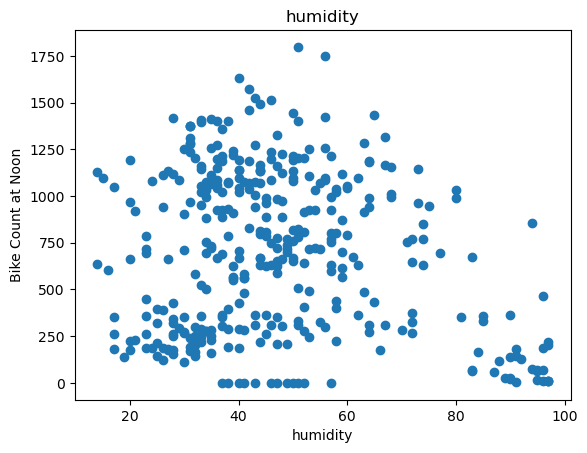

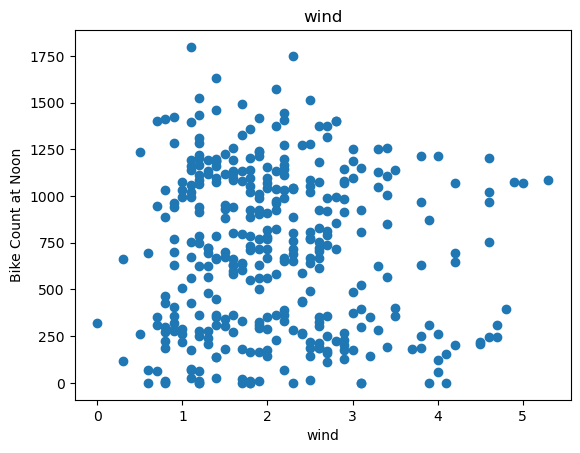

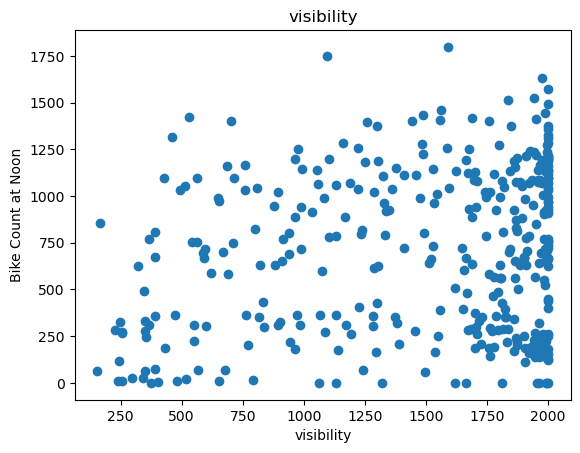

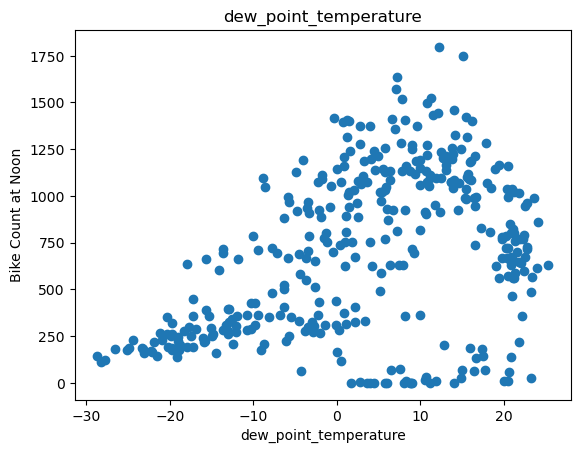

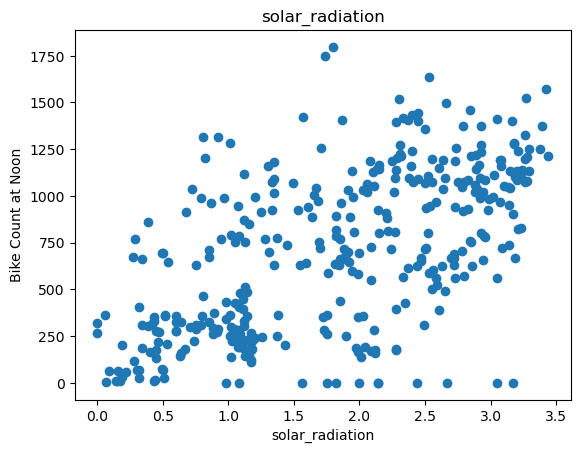

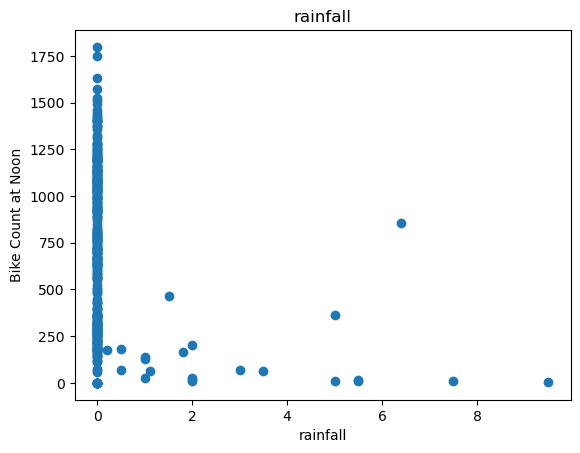

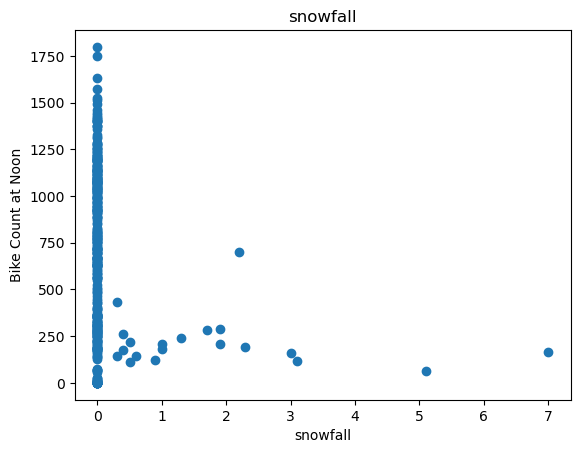

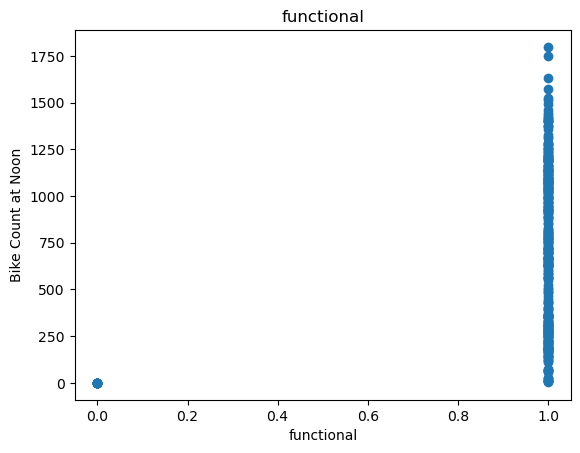

In [10]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["rent_bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [11]:
df = df.drop(["wind","visibility","functional"],axis=1)
df.head(2)

,rent_bike_count,temp,humidity,dew_point_temperature,solar_radiation,rainfall,snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0


## Treinando/Validando/Testando

In [12]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8 * len(df))])

/home/io/anaconda3/envs/notebook/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def get_xy(dataframe, y_label, x_label=None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        X = dataframe[[c for c in dataframe.columns if c!= y_label]].values
    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    return data,X,y

In [14]:
_, X_train_temp, y_train_temp = get_xy(train, "rent_bike_count",x_label=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "rent_bike_count",x_label=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "rent_bike_count",x_label=["temp"])

In [15]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [16]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.55840145]] [376.35108929]


In [17]:
temp_reg.score(X_test_temp,y_test_temp)

0.3062256090324049

2024-05-11 17:28:22.774465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-11 17:28:22.775015: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


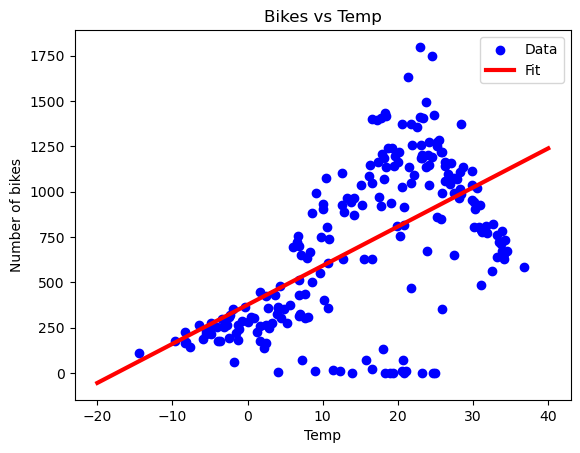

In [18]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40, 100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

## Multiple Linear Regression

In [19]:
_, X_train_all, y_train_all = get_xy(train, "rent_bike_count",x_label=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "rent_bike_count",x_label=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "rent_bike_count",x_label=df.columns[1:])

In [20]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [21]:
all_reg.score(X_test_all,y_test_all)

0.47584053391178416

## Regression with Neural Net

In [22]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/home/io/anaconda3/envs/notebook/lib/python3.12/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [25]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [26]:
history= temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,verbose=0,
    epochs=1000, validation_data=(X_val_temp, y_val_temp)
)

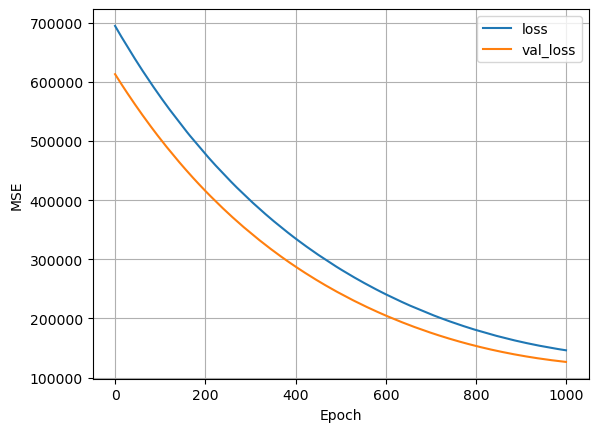

In [27]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


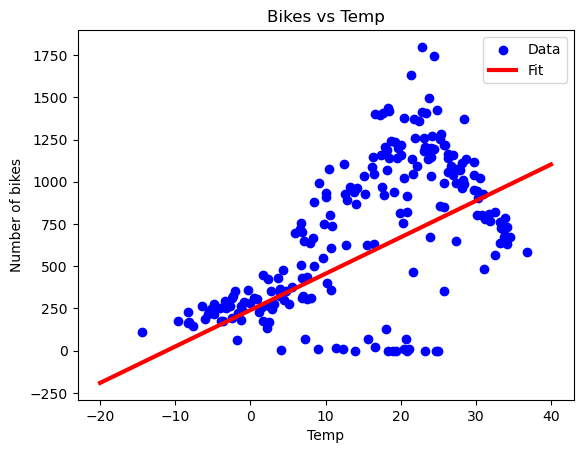

In [28]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40, 100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

## Neural Net Model

In [100]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [101]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp,y_val_temp),
    verbose=0, epochs=100
)

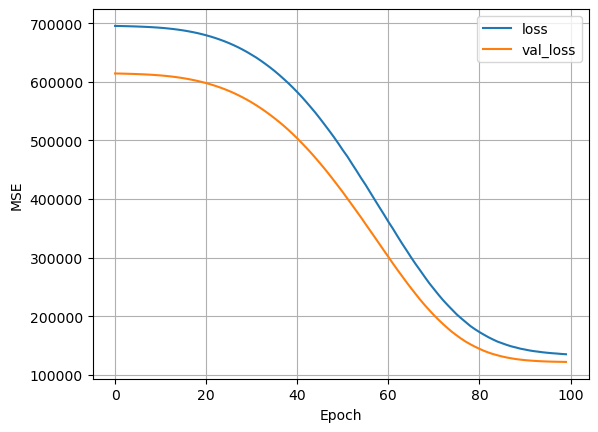

In [102]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


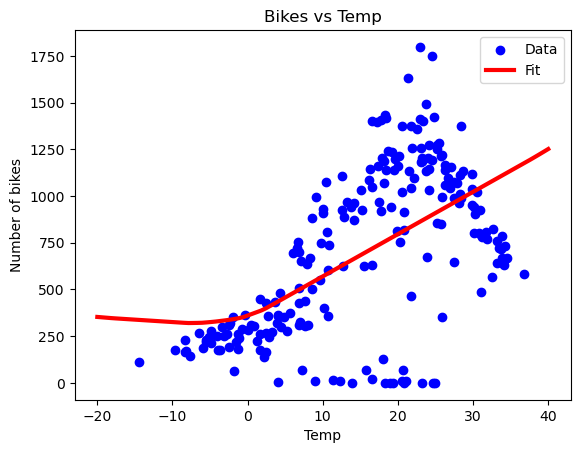

In [51]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20,40, 100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [113]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(X_train_all)

In [114]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [115]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all,y_val_all),
    verbose=0, epochs=100
)

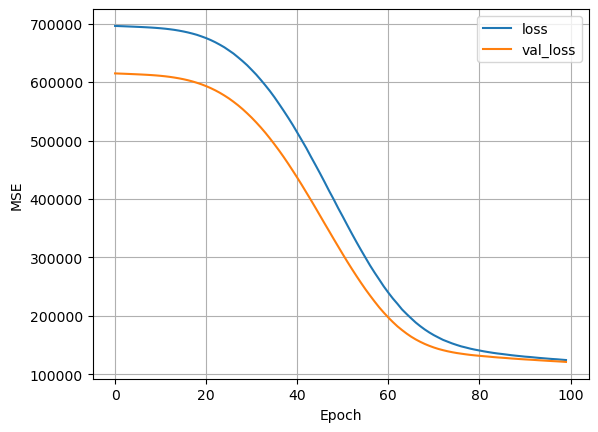

In [116]:
plot_loss(history)

In [119]:
# calculate the MSE for both linear reg and nn
y_pred_lin = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


In [120]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [122]:
MSE(y_pred_lin,y_test_all)

89924.9418041471

In [123]:
MSE(y_pred_nn, y_test_all)

124426.45199931803

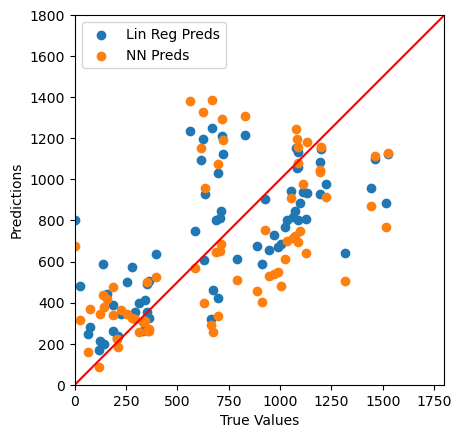

In [125]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lin, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims,lims,c="red")
plt.show()